<img src="mioti.png" style="height: 100px">
<center style="color:#888">Módulo Data Science in IoT<br/>Asignatura Data preprocessing</center>

# Challenge S6: Análisis de Tweets

## Objetivo

El objetivo de este challenge es a construir un visualizador de tweets con un dataset que contiene:

* Tweets con contenido positivo
* Tweets con contenido negativo

Para ello vamos a utilizar un dataset, o corpus, de tweets preclasificados. Constuiremos nuestro WordCloud con estos datos preprocesando los tweets previamente.

## Configuración del entorno

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist

## Carga de datos

En este caso los tweets preclasificados se encuentran en un fichero txt (`twitter_training.txt`) que contiene una línea por cada tweet y tiene la siguiente estructura `(0|1)<TABULADOR>tweet`:

In [2]:
tweets_positivos = []
tweets_negativos = []

with open('twitter_training.txt', 'r', encoding='utf-8') as file:
    for line in file:
        trozos = line.split('\t')
        if trozos[0] == '0':
            # Negativos
            tweets_negativos.append(trozos[1].lower())
        elif trozos[0] == '1':
            # Positivos
            tweets_positivos.append(trozos[1].lower())

In [3]:
print(tweets_positivos[0:5])

['the da vinci code book is just awesome.\n', "this was the first clive cussler i've ever read, but even books like relic, and da vinci code were more plausible than this.\n", 'i liked the da vinci code a lot.\n', 'i liked the da vinci code a lot.\n', "i liked the da vinci code but it ultimatly didn't seem to hold it's own.\n"]


In [4]:
print(tweets_negativos[0:5])

['da vinci code was a terrible movie.\n', 'then again, the da vinci code is super shitty movie, and it made like 700 million.\n', 'the da vinci code comes out tomorrow, which sucks.\n', 'i thought the da vinci code movie was really boring.\n', "god, yahoo games has this truly-awful looking da vinci code-themed skin on it's chessboard right now.\n"]


## Limpieza de tweets
La primera función a implementar una función que nos filtre los tweets completos sin signos de puntuación:

In [5]:
def filtrar_tweet(tweet):
    '''
    Filtra un tweet devolviendo un tweet "limpio"
    '''
    separadores = [',', '.', ';', ':', '?', '¿', '!', '¡', '*', '``']
    tweet = tweet.replace('\n', '')
    tweet = tweet.replace('series', '')
    tweet = tweet.replace("thats", "")

        
    for separador in separadores:
        tweet = tweet.replace(separador, '')
    
    #tweet = tweet.replace("'", ' ')
    tweet = tweet.lower()
    
    return tweet

In [6]:
tweets_positivos_filtrados = [filtrar_tweet(x) for x in tweets_positivos]
print(tweets_positivos_filtrados[0:5])

['the da vinci code book is just awesome', "this was the first clive cussler i've ever read but even books like relic and da vinci code were more plausible than this", 'i liked the da vinci code a lot', 'i liked the da vinci code a lot', "i liked the da vinci code but it ultimatly didn't seem to hold it's own"]


In [7]:
tweets_negativos_filtrados = [filtrar_tweet(x) for x in tweets_negativos]
print(tweets_negativos_filtrados[0:5])

['da vinci code was a terrible movie', 'then again the da vinci code is super shitty movie and it made like 700 million', 'the da vinci code comes out tomorrow which sucks', 'i thought the da vinci code movie was really boring', "god yahoo games has this truly-awful looking da vinci code-themed skin on it's chessboard right now"]


## Obtención de palabras
El siguiente paso de nuestro pipeline es convertir los tweets en palabras:

In [8]:
def obtener_palabras(tweet):
    '''
    Realiza la separación en palabras de un tweet devolviendo una lista de palabras.
    '''
    palabras = word_tokenize(tweet)

    return palabras

In [9]:
palabras_positivas = []
for t in tweets_positivos_filtrados:
    palabras_positivas.extend(obtener_palabras(t))
    
print("palabras_positivas: " + str(len(palabras_positivas)))
print(palabras_positivas[0:50])

palabras_positivas: 42657
['the', 'da', 'vinci', 'code', 'book', 'is', 'just', 'awesome', 'this', 'was', 'the', 'first', 'clive', 'cussler', 'i', "'ve", 'ever', 'read', 'but', 'even', 'books', 'like', 'relic', 'and', 'da', 'vinci', 'code', 'were', 'more', 'plausible', 'than', 'this', 'i', 'liked', 'the', 'da', 'vinci', 'code', 'a', 'lot', 'i', 'liked', 'the', 'da', 'vinci', 'code', 'a', 'lot', 'i', 'liked']


In [10]:
palabras_negativas = []
for t in tweets_negativos_filtrados:
    palabras_negativas.extend(obtener_palabras(t))
    
print("palabras_negativas: " + str(len(palabras_negativas)))
print(palabras_negativas[0:50])

palabras_negativas: 35344
['da', 'vinci', 'code', 'was', 'a', 'terrible', 'movie', 'then', 'again', 'the', 'da', 'vinci', 'code', 'is', 'super', 'shitty', 'movie', 'and', 'it', 'made', 'like', '700', 'million', 'the', 'da', 'vinci', 'code', 'comes', 'out', 'tomorrow', 'which', 'sucks', 'i', 'thought', 'the', 'da', 'vinci', 'code', 'movie', 'was', 'really', 'boring', 'god', 'yahoo', 'games', 'has', 'this', 'truly-awful', 'looking', 'da']


## Filtrar palabras
Una vez obtenidas las palabras debemos filtrar todas las palabras que no aporte información relevante al resultado. Acuérdate de filtrar también los signos de puntuación que puedan haber:

In [11]:
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
    
def filtrar_palabras(palabras, stopwords):
    ''' 
    Elimina de la lista de entrada las palabras no deseadas
    Devuelve una lista de palabras filtradas.
    '''
    out = []
    separadores = [',', '.', ';', ':', '?', '¿', '!', '¡', '*', '``', ')', '(']
    for palabra in palabras:
        if palabra in stopwords:
            pass
        elif palabra in separadores:
            pass
        elif len(palabra) < 5:
            pass
        else:
            out.append(palabra)
    return out

In [12]:
palabras_positivas_filtradas = filtrar_palabras(palabras_positivas, stopwords)

print("palabras_positivas_filtradas: " + str(len(palabras_positivas_filtradas)))
print(palabras_positivas_filtradas[0:50])

palabras_positivas_filtradas: 15678
['vinci', 'awesome', 'first', 'clive', 'cussler', 'books', 'relic', 'vinci', 'plausible', 'liked', 'vinci', 'liked', 'vinci', 'liked', 'vinci', 'ultimatly', 'exaggeration', 'midnight', 'wal-mart', 'vinci', 'amazing', 'course', 'loved', 'vinci', 'something', 'better', 'different', 'thought', 'vinci', 'great', 'runner', 'vinci', 'actually', 'movie', 'thought', 'vinci', 'pretty', 'vinci', 'beautiful', 'movies', 'vinci', 'amazing', 'wrong', 'light', 'radio', 'enjoy', 'vinci', 'vinci', 'really', 'vinci']


In [13]:
palabras_negativas_filtradas = filtrar_palabras(palabras_negativas, stopwords)

print("palabras_negativas_filtradas: " + str(len(palabras_negativas_filtradas)))
print(palabras_negativas_filtradas[0:50])

palabras_negativas_filtradas: 14320
['vinci', 'terrible', 'movie', 'vinci', 'super', 'shitty', 'movie', 'million', 'vinci', 'comes', 'tomorrow', 'sucks', 'thought', 'vinci', 'movie', 'really', 'boring', 'yahoo', 'games', 'truly-awful', 'looking', 'vinci', 'code-themed', 'chessboard', 'right', 'vinci', 'better-we', 'vinci', 'bogus', 'inaccurate', 'vinci', 'disappointing', 'things', 'written', 'never', 'mentioned', 'movie', 'better-we', 'vinci', 'bogus', 'inaccurate', 'better-we', 'vinci', 'bogus', 'inaccurate', 'better-we', 'vinci', 'bogus', 'inaccurate', 'jesus']


#### Frecuencia palabras positivas e histograma

In [14]:
from nltk.probability import FreqDist

fdist_p = FreqDist(palabras_positivas_filtradas)
fdist_p.most_common(20)

[('awesome', 1124),
 ('potter', 1086),
 ('harry', 1085),
 ('vinci', 1000),
 ('brokeback', 999),
 ('impossible', 998),
 ('mission', 997),
 ('mountain', 994),
 ('loved', 256),
 ('movie', 228),
 ('movies', 192),
 ('really', 186),
 ('would', 172),
 ('people', 167),
 ('story', 166),
 ('start', 161),
 ('felicia', 160),
 ('beautiful', 127),
 ('liked', 99),
 ('first', 97)]

In [15]:
pd.Series(palabras_positivas_filtradas).value_counts()[:200].plot(kind="bar", color = "purple")

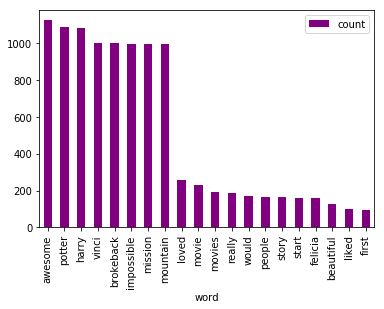

In [16]:
most_common_p_df = pd.DataFrame(fdist_p.most_common(20)).rename(columns = {0 : "word", 1 : "count"})
most_common_p_df.sort_values(by = "count", ascending = False).plot(x = "word", y = "count", kind="bar", color = "purple")

#### Frecuencia palabras negativas e histograma

In [17]:
fdist_n = FreqDist(palabras_negativas_filtradas)
fdist_n.most_common(20)

[('potter', 1007),
 ('harry', 1003),
 ('vinci', 1001),
 ('mountain', 1000),
 ('brokeback', 997),
 ('sucks', 601),
 ('sucked', 594),
 ('movie', 555),
 ('stupid', 365),
 ('really', 188),
 ('depressing', 188),
 ('horrible', 181),
 ('terrible', 174),
 ('movies', 174),
 ('fucking', 169),
 ('right', 163),
 ('think', 112),
 ('heard', 95),
 ('mission', 93),
 ('impossible', 93)]

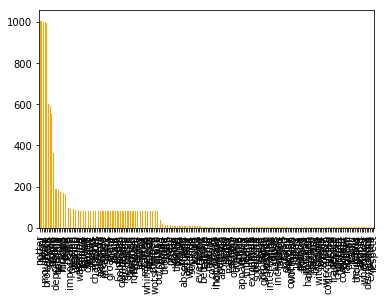

In [18]:
pd.Series(palabras_negativas_filtradas).value_counts()[:200].plot(kind="bar", color = "orange")

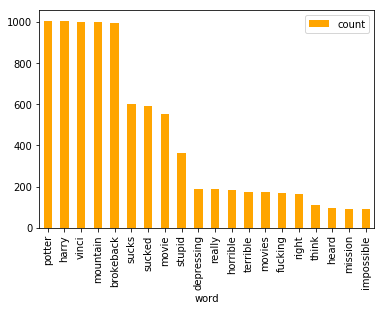

In [19]:
most_common_n_df = pd.DataFrame(fdist_n.most_common(20)).rename(columns = {0 : "word", 1 : "count"})
most_common_n_df.sort_values(by = "count", ascending = False).plot(x = "word", y = "count", kind="bar", color = "orange")

## Wordclouds

Vamos a dar un primer vistazo a los resultados. Construye un wordcloud para sentimiento positivo, uno para sentimiento negativo y otro que combine ambos tipos de palabras. 

Recuerda que wordcloud espera que le pases las palabras separadas por espacios en una misma cadena. Para ello, ayúdate de `join`: `palabras_positivas_juntas = ' '.join(palabras_positivas)`

### Wordcloud de sentimientos positivos

In [20]:
palabras_positivas_filtradas_join = ' '.join(palabras_positivas_filtradas)

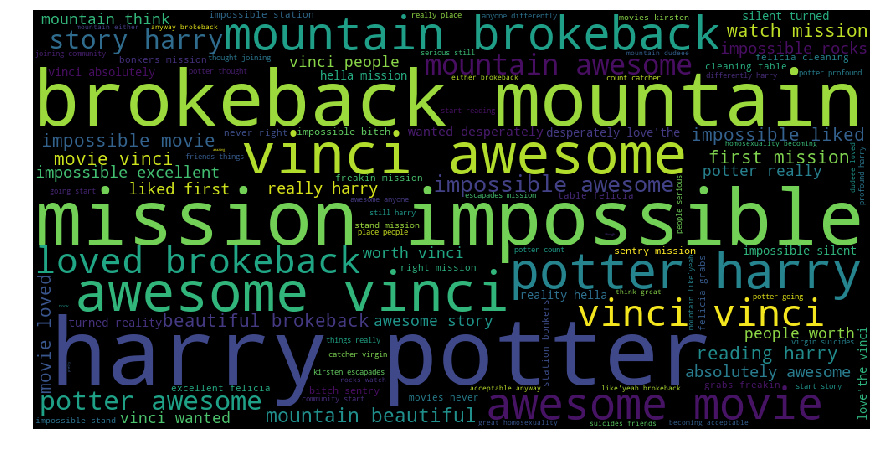

In [21]:
from wordcloud import WordCloud

wordcloud = WordCloud(width = 1000, height = 500, relative_scaling = 0.5).generate(palabras_positivas_filtradas_join)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Wordcloud de sentimientos negativos

In [22]:
palabras_negativas_filtradas_join = ' '.join(palabras_negativas_filtradas)

In [23]:
from wordcloud import WordCloud

wordcloud = WordCloud(width = 1000, height = 500, relative_scaling = 0.5).generate(palabras_negativas_filtradas_join)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Wordcloud de ambos sentimientos

In [24]:
sentimientos = palabras_negativas_filtradas + palabras_positivas_filtradas
sentimientos_join = ' '.join(sentimientos)

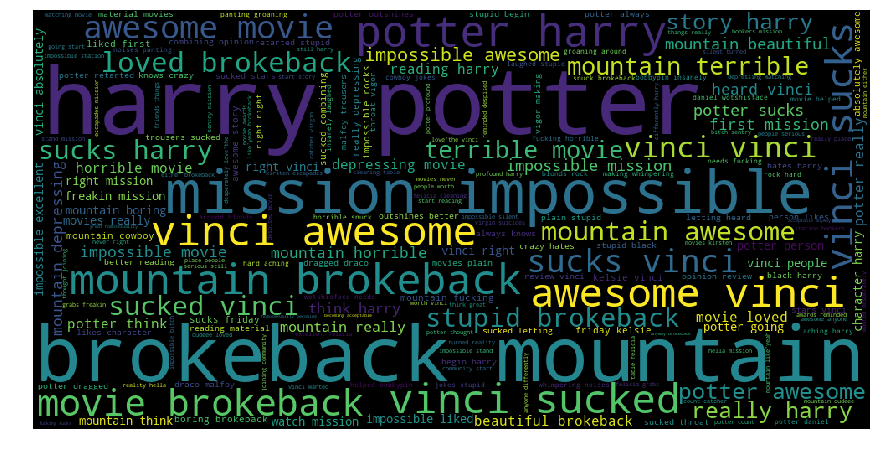

In [25]:
from wordcloud import WordCloud

wordcloud = WordCloud(width = 1000, height = 500, relative_scaling = 0.5).generate(sentimientos_join)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

* ¿Qué te parecen los resultados?
* ¿Qué crees que se podría mejorar?

## Análisis de frecuencias de tweets negativos y positivos
A partir de las palabras filtradas queremos el conjunto de palabras que nos muestre cuales son las palabras más probables en cada categoría (tweet positivo o negativo).

In [26]:
from nltk import FreqDist, bigrams

def calcula_palabras_mas_probables(palabras, n):
    '''
    Devuelve un conjunto con las n palabras más probables
    '''
    conjunto = set()
    fdist = FreqDist(palabras)
    conjunto = fdist.most_common(n) 
    
    return conjunto

In [27]:
conjunto_positivas = calcula_palabras_mas_probables(palabras_positivas_filtradas, 150)  

print("conjunto_positivas: " + str(len(conjunto_positivas)))

conjunto_positivas = dict(conjunto_positivas)
conjunto_positivas

conjunto_positivas: 150


{'awesome': 1124,
 'potter': 1086,
 'harry': 1085,
 'vinci': 1000,
 'brokeback': 999,
 'impossible': 998,
 'mission': 997,
 'mountain': 994,
 'loved': 256,
 'movie': 228,
 'movies': 192,
 'really': 186,
 'would': 172,
 'people': 167,
 'story': 166,
 'start': 161,
 'felicia': 160,
 'beautiful': 127,
 'liked': 99,
 'first': 97,
 'reading': 95,
 'absolutely': 93,
 'great': 92,
 'still': 90,
 'think': 90,
 'thought': 88,
 'excellent': 86,
 'right': 86,
 'watch': 86,
 'going': 86,
 'rocks': 85,
 'things': 84,
 'friends': 84,
 'never': 84,
 'worth': 82,
 'community': 82,
 'place': 82,
 'anyway': 82,
 'anyone': 81,
 'stand': 81,
 'wanted': 81,
 'turned': 81,
 'either': 81,
 'freakin': 81,
 'bitch': 81,
 'acceptable': 81,
 'desperately': 80,
 "love'the": 80,
 'silent': 80,
 'reality': 80,
 'hella': 80,
 'sentry': 80,
 'station': 80,
 'bonkers': 80,
 'cleaning': 80,
 'table': 80,
 'grabs': 80,
 'kirsten': 80,
 'escapades': 80,
 'joining': 80,
 'profound': 80,
 'differently': 80,
 'serious': 80,

In [28]:
conjunto_negativas = calcula_palabras_mas_probables(palabras_negativas_filtradas, 150)    
    
print("conjunto_negativas: " + str(len(conjunto_negativas)))
conjunto_negativas = dict(conjunto_negativas)
conjunto_negativas

conjunto_negativas: 150


{'potter': 1007,
 'harry': 1003,
 'vinci': 1001,
 'mountain': 1000,
 'brokeback': 997,
 'sucks': 601,
 'sucked': 594,
 'movie': 555,
 'stupid': 365,
 'really': 188,
 'depressing': 188,
 'horrible': 181,
 'terrible': 174,
 'movies': 174,
 'fucking': 169,
 'right': 163,
 'think': 112,
 'heard': 95,
 'mission': 93,
 'impossible': 93,
 'boring': 92,
 'person': 85,
 'reading': 84,
 'making': 84,
 'watching': 83,
 'around': 83,
 'friday': 82,
 'knows': 82,
 'hates': 82,
 'review': 82,
 'opinion': 82,
 'better': 82,
 'needs': 81,
 'character': 81,
 'always': 81,
 'jokes': 81,
 'kelsie': 80,
 'combining': 80,
 'letting': 80,
 'stars': 80,
 'retarted': 80,
 'black': 80,
 'crazy': 80,
 'outshines': 80,
 'material': 80,
 'plain': 80,
 'begin': 80,
 'likes': 80,
 'dragged': 80,
 'draco': 80,
 'malfoy': 80,
 'trousers': 80,
 'throat': 80,
 'vigor': 80,
 'whimpering': 80,
 'noises': 80,
 'panting': 80,
 'groaning': 80,
 'blonds': 80,
 'rock-hard': 80,
 'aching': 80,
 'daniel': 80,
 'wotshisface': 80

### ¿Se te ocurre como mejorarlo?
Como ves existen muchas palabras parecidas, o directamente las mismas, ¿se te ocurre cómo podríamos mejorarlo?. Por ejemplo, podríamos eliminar esas palabras comunes de ambos conjuntos, ya que no aportan nada.

In [29]:
comunes_positivas = []
comunes_negativas = []

for key, value in conjunto_positivas.items():
    comunes_positivas.append(key)
    
for key, value in conjunto_negativas.items():
    comunes_negativas.append(key)

comunes = set(comunes_positivas) & set(comunes_negativas)

Una vez tenemos las palabras comunes, podemos aplicarlo a los conjuntos tal y como hemos hecho con el resto de transformaciones.

In [30]:
def quitar_comunes(words, comunes):
    out = []
    words_list = []
    for key, value in words.items():
        words_list.append(key)
    
    duplicated = set(words_list) & set(comunes)
    
    for word in words_list:
        if word in duplicated:
            pass
        else:
            out.append(word)
    return out

In [31]:
conjunto_positivas_filtradas = quitar_comunes(conjunto_positivas, comunes)
print("conjunto_positivas_filtradas: ", str(conjunto_positivas_filtradas))

conjunto_positivas_filtradas:  ['awesome', 'loved', 'start', 'felicia', 'beautiful', 'liked', 'excellent', 'rocks', 'friends', 'worth', 'community', 'place', 'anyway', 'stand', 'wanted', 'turned', 'either', 'freakin', 'bitch', 'acceptable', 'desperately', "love'the", 'silent', 'reality', 'hella', 'sentry', 'station', 'bonkers', 'cleaning', 'table', 'grabs', 'kirsten', 'escapades', 'joining', 'profound', 'differently', 'serious', 'count', 'catcher', 'virgin', 'suicides', "like'yeah", 'dudeee', 'homosexuality', 'becoming', 'amazing', 'enjoy', 'theme', 'enjoyed', 'course', 'demons', 'looks', 'finished', 'crash', 'something', 'angels', 'seeing', 'personally', 'totally', 'freaking', 'picture', 'different', 'x-men', 'almost', 'theater', 'fandom', 'every', 'brown', 'telling', 'music', 'novel', 'hedge', 'played', 'finally', 'least', 'stories', 'money', 'stuff', 'example', 'goblet', 'eragon', 'comes', 'children', 'culture', 'gorgeous', 'heart', 'biased', 'equal', 'awesomest', 'sounds', 'aaron',

#### WordCloud Palabras Positivas

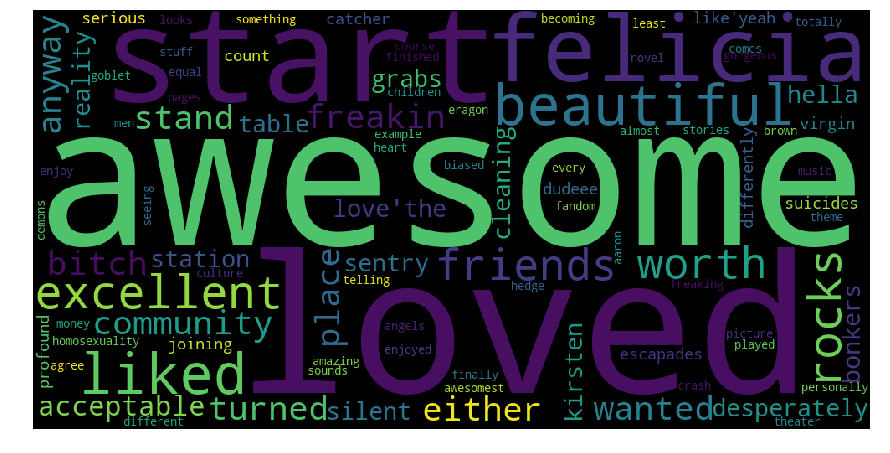

In [32]:
conjunto_positivas_filtradas_join = ' '.join(conjunto_positivas_filtradas)

wordcloud = WordCloud(width = 1000, height = 500, relative_scaling = 0.5).generate(conjunto_positivas_filtradas_join)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [33]:
conjunto_negativas_filtradas = quitar_comunes(conjunto_negativas, comunes)
print("conjunto_negativas_filtradas: ", str(conjunto_negativas_filtradas))

conjunto_negativas_filtradas:  ['sucks', 'sucked', 'stupid', 'depressing', 'horrible', 'terrible', 'heard', 'boring', 'person', 'around', 'knows', 'hates', 'review', 'needs', 'character', 'jokes', 'kelsie', 'combining', 'letting', 'stars', 'retarted', 'black', 'crazy', 'outshines', 'material', 'plain', 'begin', 'likes', 'dragged', 'draco', 'malfoy', 'trousers', 'throat', 'vigor', 'whimpering', 'noises', 'panting', 'groaning', 'blonds', 'rock-hard', 'aching', 'daniel', 'wotshisface', 'snuck', 'helped', 'bobbypin', 'insanely', 'laughed', 'cowboy', 'awards', 'reminded', 'despised', 'hated', 'balls', 'kinda', 'awful', 'world', 'crappy', 'sucking', 'better-we', 'bogus', 'inaccurate', 'saying', 'mother', 'cowboys', 'shitty', 'apparently', 'officially', 'stinks', 'school', 'majorly', 'major', 'might', 'georgia', 'board', 'nearly', 'hollywood', 'jesus', 'worthless', 'audrey', 'tautou', 'someone', 'incredibly', 'looked', 'passion', 'donkey', 'conclusion', 'funny', 'whole', 'god-awful', 'bullshi

#### WordCloud Palabras Negativas

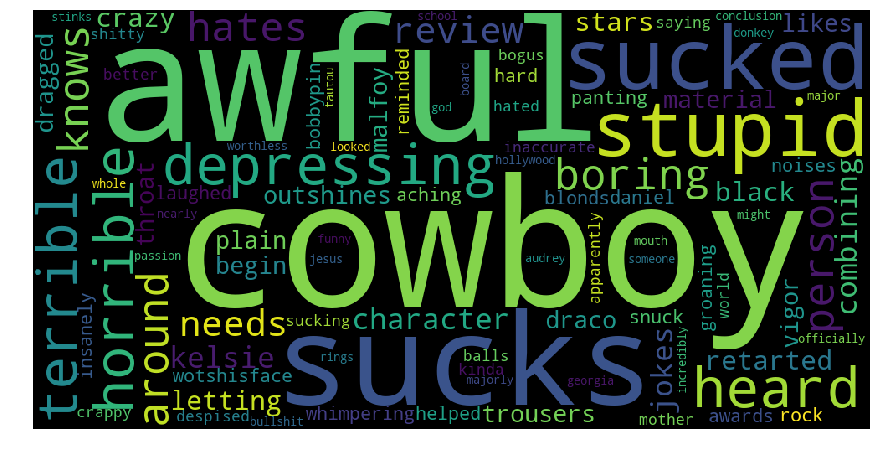

In [34]:
conjunto_negativas_filtradas_join = ' '.join(conjunto_negativas_filtradas)

wordcloud = WordCloud(width = 1000, height = 500, relative_scaling = 0.5).generate(conjunto_negativas_filtradas_join)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

###  Punto extra: histogramas

Construye histogramas para cada uno de los casos anteriores y compara si tiene sentido lo que se muestra.

In [35]:
#IMPLEMENTA AQUI TU CODIGO
def dictionary_conjunto(conjunto_filtrado, conjunto):
    filtradas = {}
    for word in conjunto_filtrado:
        if word in conjunto.keys():
            filtradas.update({word:conjunto[word]})
    return filtradas
        
positivas_filtradas = dictionary_conjunto(conjunto_positivas_filtradas, conjunto_positivas)
negativas_filtradas = dictionary_conjunto(conjunto_negativas_filtradas, conjunto_negativas)

#### Histograma Palabras Positivas

Text(0.5, 1.0, 'Top 20 palabras positivas')

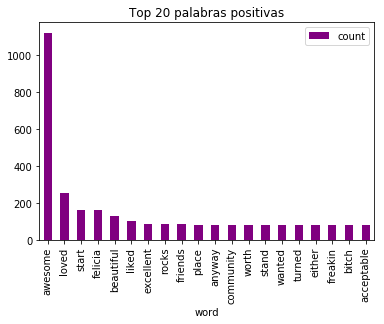

In [36]:
fdist_positivas = FreqDist(positivas_filtradas)
most_common_df_pos = pd.DataFrame(fdist_positivas.most_common(20)).rename(columns = {0 : "word", 1 : "count"})
most_common_df_pos.sort_values(by = "count", ascending = False).plot(x = "word", y = "count", kind="bar", color = "purple")
plt.title('Top 20 palabras positivas')

#### Histograma Palabras Negativas

Text(0.5, 1.0, 'Top 20 palabras negativas')

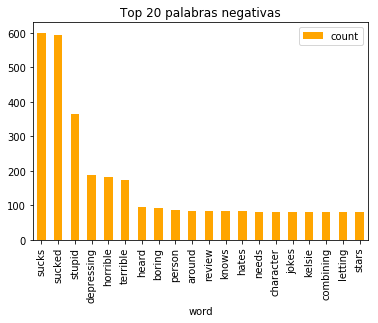

In [37]:
fdist_negativas = FreqDist(negativas_filtradas)
most_common_df_neg = pd.DataFrame(fdist_negativas.most_common(20)).rename(columns = {0 : "word", 1 : "count"})
most_common_df_neg.sort_values(by = "count", ascending = False).plot(x = "word", y = "count", kind="bar", color = "orange")
plt.title('Top 20 palabras negativas')

## Conclusiones

* ¿Qué otras técnicas habrías aplicado?
* ¿Cuál crees que sería el siguiente paso?

Habría aplicado la distancia entre cadenas ya que, si nos fijamos en las dos primeras palabras del conjunto "Palabras Negativas", son la misma pero en distinta conjugación.
También se podría crear una lista con verbos que no expresan emociones y así quitarlos todos (por ejemplo: need, want) y otro con los que sí que expresan emociones y aplicarles el método de la distancia entre cadenas para así dejarlo todo en infinitivo.
Otra cosa que se podría hacer para mejorar podría ser tener un dataframe, lista con nombres y personajes de las películas bajo estudio, así no obtendríamos los nombres de los personajes en los top 20 de palabras.
También, relacionado con esto último, se podrían eliminar todas las palabras relacionadas con películas/series, como review, character, etc ya que no nos aportan nada y se repiten mucho también.



Como siguiente paso, se podrían analizar las películas con más comentarios negativos/positivos; así como a sus personajes. Esto podría dar una idea bastante buena de lo que le gusta (o no) al público.